<a href="https://colab.research.google.com/github/hyunwookim129/pneumonia_detection/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:21<00:00, 114MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path

In [8]:
train_image_path =pathlib.Path('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train')
val_image_path = pathlib.Path('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val')
test_image_path = pathlib.Path('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test')
images_class = os.listdir(train_image_path)
print(images_class)

['NORMAL', 'PNEUMONIA']


In [6]:
normal_images = os.listdir(train_image_path / "NORMAL")
pneumonia_images = os.listdir(train_image_path / "PNEUMONIA")
num_normal_images = len(normal_images)
num_pneumonia_images = len(pneumonia_images)

print(f"Number of normal images: {num_normal_images}")
print(f"Number of normal images: {num_pneumonia_images}")

Number of normal images: 1341
Number of normal images: 3875


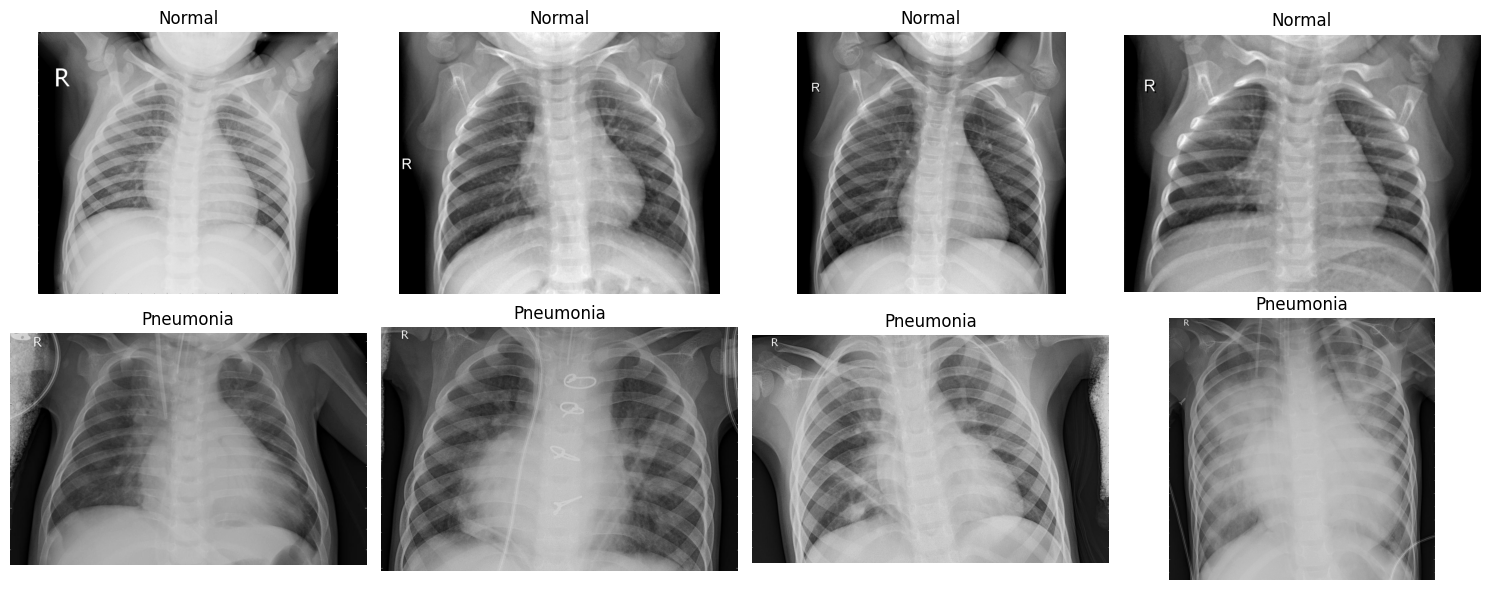

In [13]:
sample_normal_images = normal_images[:4]
sample_pneumonia_images = pneumonia_images[:4]


fig, axes = plt.subplots(2, 4, figsize=(15, 6))
for i, img_name in enumerate(sample_normal_images):
    img_path = train_image_path / "NORMAL" / img_name
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    ax = axes[0, i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Normal")
    ax.axis('off')  # Eksenleri kaldır


for i, img_name in enumerate(sample_pneumonia_images):
    img_path = train_image_path / "PNEUMONIA" / img_name
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    ax = axes[1, i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pneumonia")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
gpu_devices = tf.config.list_physical_devices('GPU')


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data
train_generator = train_datagen.flow_from_directory(
    train_image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model (TensorFlow will automatically use the GPU)
with tf.device('/GPU:0'):  # Explicitly use GPU
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=25,
        callbacks=[early_stopping]
    )

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 417ms/step - accuracy: 0.7488 - loss: 0.5916 - val_accuracy: 0.6250 - val_loss: 0.8567
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 405ms/step - accuracy: 0.8303 - loss: 0.3509 - val_accuracy: 0.8125 - val_loss: 0.4330
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 405ms/step - accuracy: 0.8533 - loss: 0.3058 - val_accuracy: 0.8125 - val_loss: 0.4545
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 406ms/step - accuracy: 0.8764 - loss: 0.2810 - val_accuracy: 0.8125 - val_loss: 0.5158
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 406ms/step - accuracy: 0.8822 - loss: 0.2842 - val_accuracy: 0.8750 - val_loss: 0.4317
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 403ms/step - accuracy: 0.8811 - loss: 0.2794 - val_accuracy: 0.8125 - val_loss: 0.4712
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 405ms/step - accuracy: 0.8762 - loss: 0.2780 - val_accuracy: 0.7500 - val_loss: 0.4495
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 405ms/step - accuracy: 0.8972 - loss: 0.2302 - val

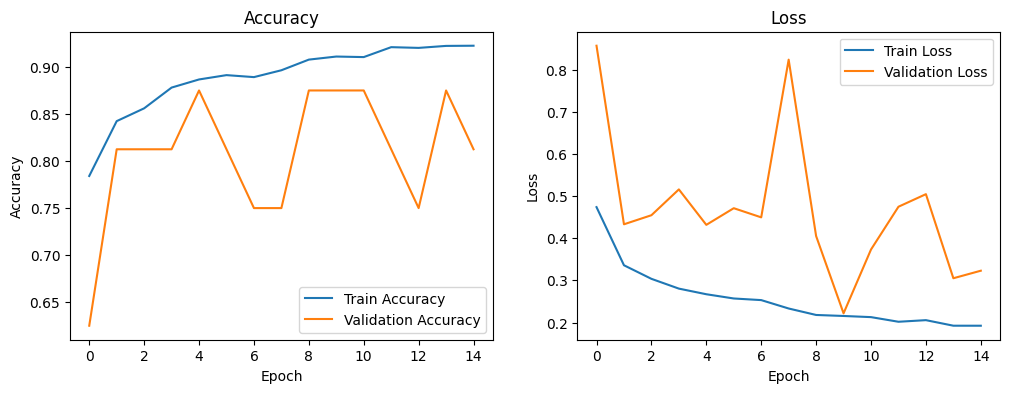

In [15]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

def predict_pneumonia(image_path):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (150, 150))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    with tf.device('/GPU:0'):  # Use GPU for prediction
        prediction = model.predict(img)[0][0]
    if prediction > 0.5:
        print("Prediction: Pneumonia")
    else:
        print("Prediction: Normal")

# Test prediction
predict_pneumonia(test_image_path/ "NORMAL" / "IM-0001-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: Normal


In [22]:
test_image = test_image_path / "NORMAL" / "IM-0001-0001.jpeg"
predict_pneumonia(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
Prediction: Normal


Correctly detects NORMAL: 87.18% (204/234)
Correctly detects PNEUMONIA: 93.08% (363/390)


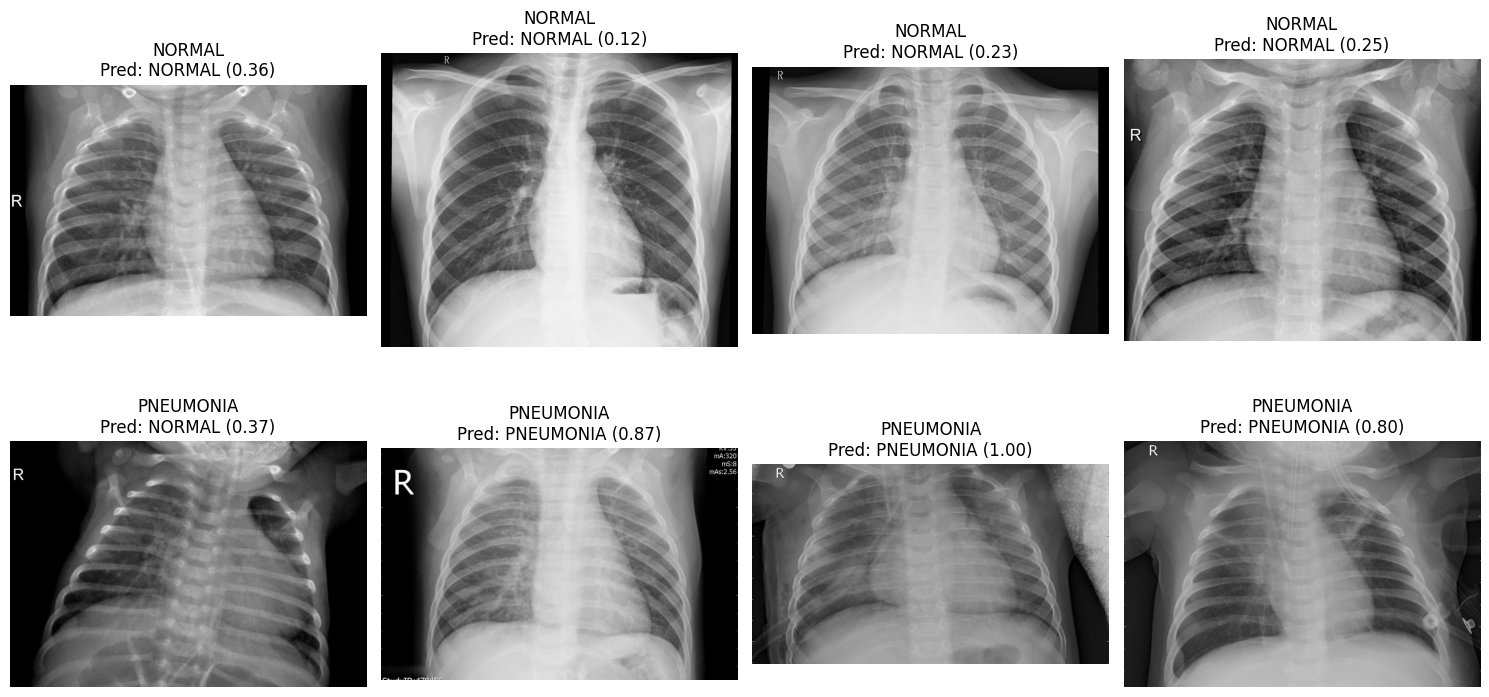

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf

# Function to make predictions, calculate accuracy, and visualize results
def test_and_visualize_all_images(model, test_image_path):
    # Paths for NORMAL and PNEUMONIA images
    normal_dir = test_image_path / "NORMAL"
    pneumonia_dir = test_image_path / "PNEUMONIA"

    # Initialize counters for accuracy calculation
    normal_correct = 0
    normal_total = 0
    pneumonia_correct = 0
    pneumonia_total = 0

    # Collect results
    results = []

    # Use GPU for predictions
    with tf.device('/GPU:0'):  # Enforce GPU usage
        # Process NORMAL images
        for img_name in os.listdir(normal_dir):
            img_path = normal_dir / img_name
            img = cv2.imread(str(img_path))
            if img is not None:
                img = cv2.resize(img, (150, 150))  # Resize to model's input size
                img = img_to_array(img) / 255.0   # Normalize and convert to array
                img = np.expand_dims(img, axis=0)  # Add batch dimension

                # Predict
                prediction = model.predict(img,verbose=0)[0][0]
                predicted_label = "NORMAL" if prediction <= 0.5 else "PNEUMONIA"
                results.append((img_path, prediction, "NORMAL"))

                # Accuracy tracking
                normal_total += 1
                if predicted_label == "NORMAL":
                    normal_correct += 1

        # Process PNEUMONIA images
        for img_name in os.listdir(pneumonia_dir):
            img_path = pneumonia_dir / img_name
            img = cv2.imread(str(img_path))
            if img is not None:
                img = cv2.resize(img, (150, 150))  # Resize to model's input size
                img = img_to_array(img) / 255.0   # Normalize and convert to array
                img = np.expand_dims(img, axis=0)  # Add batch dimension

                # Predict
                prediction = model.predict(img,verbose=0)[0][0]
                predicted_label = "NORMAL" if prediction <= 0.5 else "PNEUMONIA"
                results.append((img_path, prediction, "PNEUMONIA"))

                # Accuracy tracking
                pneumonia_total += 1
                if predicted_label == "PNEUMONIA":
                    pneumonia_correct += 1

    # Calculate accuracies
    normal_accuracy = (normal_correct / normal_total) * 100 if normal_total > 0 else 0
    pneumonia_accuracy = (pneumonia_correct / pneumonia_total) * 100 if pneumonia_total > 0 else 0

    # Print accuracies
    print(f"Correctly detects NORMAL: {normal_accuracy:.2f}% ({normal_correct}/{normal_total})")
    print(f"Correctly detects PNEUMONIA: {pneumonia_accuracy:.2f}% ({pneumonia_correct}/{pneumonia_total})")

    # Visualize results
    visualize_results(results)

# Function to visualize the results
def visualize_results(results):
    # Sort results by label
    normal_results = [r for r in results if r[2] == "NORMAL"]
    pneumonia_results = [r for r in results if r[2] == "PNEUMONIA"]

    # Combine both for visualization
    combined_results = normal_results[:4] + pneumonia_results[:4]  # Visualize 4 from each

    # Plot
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    for i, (img_path, prediction, label) in enumerate(combined_results):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

        ax = axes[i // 4, i % 4]
        ax.imshow(img)
        ax.set_title(f"{label}\nPred: {'PNEUMONIA' if prediction > 0.5 else 'NORMAL'} ({prediction:.2f})")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Test and visualize results
test_and_visualize_all_images(model, test_image_path)
